In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import os
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Model Building and Validation

In [39]:
#Retrieving stored dataframe 
%store -r df_dummies

In [40]:
X = df_dummies.drop(['Heating Load', 'Glazing Area', 'Orientation of 3', 'Orientation of 4', 'Orientation of 5', 
                     'Glazing Area Distribution of 1', 'Glazing Area Distribution of 2', 'Glazing Area Distribution of 3',
                     'Glazing Area Distribution of 4', 'Glazing Area Distribution of 5'], axis = 1)
y = df_dummies['Heating Load']


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

In [42]:
lin_regress = LinearRegression()
lin_regress.fit(X_train, y_train)

LinearRegression()

In [44]:
#Model Success Rate
pred = lin_regress.predict(X_test)
r2_score(y_test, pred)

0.8551197181206316

In [45]:
output = pd.DataFrame({"Actual Heating Load": y_test, "Predicted Heating Load": pred})
output.head()

,Actual Heating Load,Predicted Heating Load
226,11.07,12.790091
610,14.33,12.790091
505,11.67,10.857707
470,12.86,14.121511
474,16.56,14.722474


In [46]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (576, 5)
y_train shape: (576,)
X_test shape: (192, 5)
y_test shape: (192,)


(0.0, 50.0)

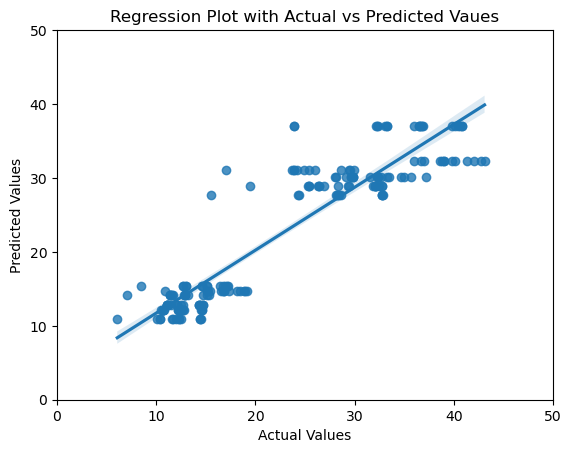

In [58]:
sns.regplot(x = y_test, y = pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot with Actual vs Predicted Vaues")
plt.xlim(0, 50)
plt.ylim(0, 50)
